#### __***FEATURE IMPORTANCE***__

In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv('data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
X, y = df.drop('Outcome', axis=1), df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
imp_df = pd.DataFrame({'Feature': X.columns, 
                       'Importance': model.feature_importances_})
imp_df = imp_df.sort_values(by='Importance', ascending=False)

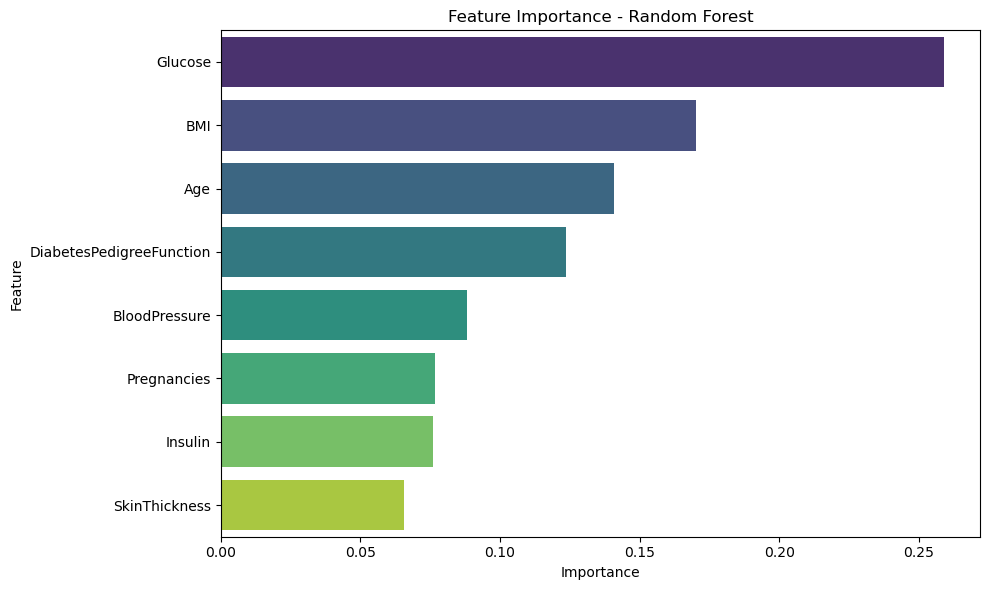

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=imp_df, palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()

In [16]:
top_features = imp_df.head(3)
top_features

,Feature,Importance
1,Glucose,0.258864
5,BMI,0.169984
7,Age,0.140931
